In [0]:
import pandas as pd
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Book1.csv to Book1.csv


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Book1.csv" with length 16158 bytes


In [0]:
import io
sample_df = pd.read_csv(io.StringIO(uploaded['Book1.csv'].decode('utf-8')),header=None)

In [0]:
sample_df =sample_df.transpose()
sample_df.columns=["Age","Blood_Pressure","BMI","Plasma_level","Autoimmune_Disease", "Adverse_events", "Drug_in_serum","Liver_function", "Activity_test", "Secondary_test"]
sample_df


In [0]:
S=sample_df[["Age", "Blood_Pressure", "BMI", "Plasma_level", "Adverse_events", "Drug_in_serum", "Liver_function", "Activity_test", "Secondary_test"]]
P=sample_df[["Autoimmune_Disease"]]

In [0]:
#ENCODING
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Autoimmune_Disease=P.Autoimmune_Disease
y=pd.DataFrame(le.fit_transform(Autoimmune_Disease))
print(y)

In [8]:
#Shape
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
X = sample_df.drop(columns = ['Autoimmune_Disease']) 
X_scaled = preprocessing.scale(X)
X_scaled.mean(axis=0)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y) 
print(X_train.shape) 
print(X_test.shape)

(282, 9)
(94, 9)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


In [0]:
#KNN MODEL
from sklearn.neighbors import KNeighborsClassifier
autoimmune_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') 
autoimmune_knn.fit(X_train, y_train)
accuracy_knn = autoimmune_knn.score(X_test, y_test) 
print(format(accuracy_knn))


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

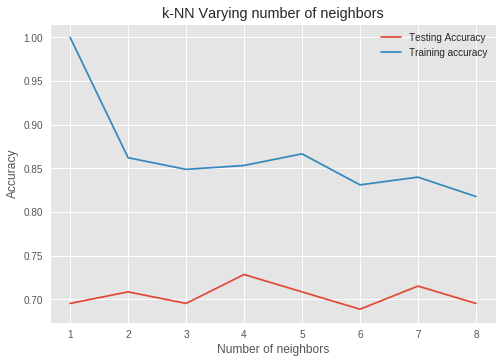

In [12]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [13]:
#Accuracy
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.7284768211920529

In [14]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[96,  8],
       [33, 14]])

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
y_pred_proba = knn.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       104
           1       0.64      0.30      0.41        47

   micro avg       0.73      0.73      0.73       151
   macro avg       0.69      0.61      0.61       151
weighted avg       0.71      0.73      0.69       151



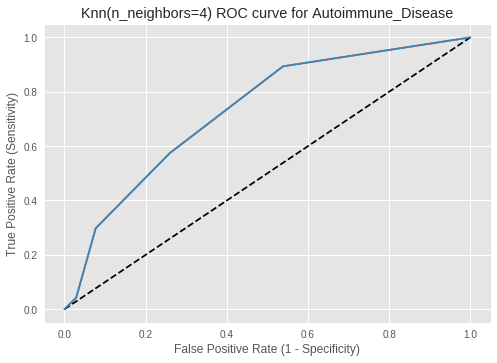

In [16]:

#ROC curve for KNN
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Knn(n_neighbors=4) ROC curve for Autoimmune_Disease')
plt.grid(True)
plt.show()


In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7395662847790507

In [0]:
#Best Fit
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

In [18]:
#Best Score
knn_cv.best_score_


0.7606382978723404

In [19]:
#Best Neighbor
knn_cv.best_params_

{'n_neighbors': 11}